In [1]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
from cycler import cycler
import matplotlib.patches as mpatches
import seaborn as sns
import arviz as az
import scipy.stats as stats
import ROOT as r
import time
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["mathtext.fontset"]="cm"
plt.rcParams['errorbar.capsize'] = 3
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=22
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle']=':'
plt.rcParams['grid.color']='black'
plt.rcParams['axes.prop_cycle'] = cycler(color=['black', 'red', 'blue', 'green'])

import arviz as az
import warnings
warnings.filterwarnings('ignore')
%jsroot on





Welcome to JupyROOT 6.24/06


In [2]:

def fit(nsamples):
    cols=[f'ebin{i:02d}costbin{j:02d}' for i in range(11) for j in range(12)]
    diagnostics_df=pd.DataFrame(columns=cols,index=['sigma_median','mcse','rhat'])
    sigma_df=pd.DataFrame(columns=cols)
    for i in range(1):#no. of energy bins
        for j in range(1):#no. of angle bins
            #read data
            df=pd.read_csv(f"ebin{i:02d}/ebin{i:02d}costbin{j:02d}.txt",sep="\t")
            df.columns=['pol','phi','weight']
            #these are prompt peak events
            prmpt=df.loc[df['weight']==1]
            prmpt=prmpt.reset_index(drop=True)
            #sideband
            side=df.loc[df['weight']!=1]
            side=side.reset_index(drop=True)
            nprmpt=len(prmpt)
            total_nside=(len(side))
            #weights used in the data, including 1--> exterminate 1
            weights=pd.unique(df['weight'].values)
            weights=np.array(weights[weights!=1])
            #sideband events are identified by the corresponding weights
            nside=np.array([len(df.loc[df['weight']==weights[i]])for i in range(7)])
            #fraction of signal in prompt peak, note that the weights are already negative (TO BE CHECKED W/ FARAHS DATA!)
            f=(nprmpt+np.sum(nside*weights))/nprmpt
            #print(f)
            stan_data={
                'N':nprmpt, #no. of prompt peak events and corresponding pol and phi values
                'phi_prmpt':list(prmpt['phi'].values),
                'pol_prmpt':list(prmpt['pol'].values),
                'M':total_nside,#no. of sideband events and..
                'phi_side':list(side['phi'].values),
                'pol_side':list(side['pol'].values),
                'f':f #fraction of signal in prmpt peak
            }
            #now the stan model and mcmc
            model=sp.CmdStanModel(stan_file='toyMC_stan.stan')
            model.compile()
            fitobj=model.sample(data=stan_data,iter_sampling=nsamples,inits=0)
            summary=fitobj.summary()
            samples=fitobj.draws_pd()
            #get mcmc diagnostics
            median=summary['50%']['sigma']
            mcse=(az.mcse(np.transpose(fitobj.draws(concat_chains=False)[:,:,7]),method='median'))
            rhat=(summary['R_hat']['sigma'])
            tmp_list=[median,mcse,rhat]
            currbin=f"ebin{i:02d}costbin{j:02d}"
            diagnostics_df[currbin]=tmp_list
            sigma_df[currbin]=samples['sigma']
    return diagnostics_df, sigma_df
        


In [3]:
x=[1,2,3,4]
y=[]

y_e=[]
for n in [1000,2000,5000,10000]:
    df=fit(n)[0]
    y.append(df['ebin00costbin00']['sigma_median'])
    y_e.append(df['ebin00costbin00']['mcse'])




INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


[-0.18910536 -0.07570319 -0.04340814 -0.0354625 ]


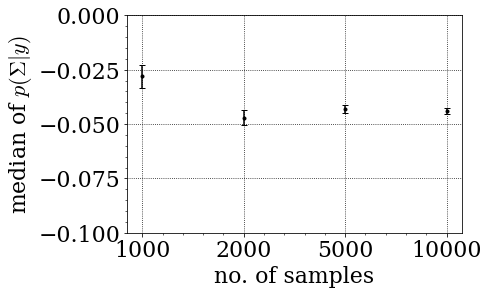

In [4]:
plt.errorbar(x=x,y=y,yerr=y_e ,fmt='.')
plt.ylim([-0.1,0])
plt.xlabel("no. of samples")
plt.xticks([1,2,3,4],[1000,2000,5000,10000])
plt.ylabel("median of $p(\Sigma|y)$")
print(np.array(y_e)/np.array(y))
plt.show()

In [5]:
i=5
j=1

curr_e=1130+(i+1)*60-30
curr_ct=-1+(j+1)*1/6-1/12
curr_sigma=farahs_data.loc[(farahs_data['egamma']==curr_e) & (farahs_data['costheta']==-0.75)]
print(curr_sigma)

NameError: name 'farahs_data' is not defined